## pandas
---

In [2]:
import pandas as pd
import numpy as np

### 基本介绍
---
+ `pd.DataFrame`格式：
    ```python
    pd.DataFrame(data, index, columns, dtype=None, copy=None)
    ```
    其中如果data传入的是`dict`，则`dict`中的key为columns,value为data（一般都是numpy ndarray格式，此时不需要指定index）；如果`dict`中的value格式为常量，则需要指定index
+ pandas的会自动为每个元素添加序号
+ `pd.Series`相当于numpy中的一维向量，`pd.DataFrame`相当于二维表
+ 默认情况下pandas添加序列的方式是从0开始递增添加。序列可以自己设置
+ `df.dtypes`可以按`column`打印数据类型
+ `df.index`可以输出`index`名称
+ `df.columns`可以输出`columns`名称
+ `df.values`可以输出所有值
+ `df.describe()`输出一些基本的数学运算结果（如min, mean, count等）
+ `df.T`：转置DataFrame
+ `df.sort_index(axis=0, ascending=True)`可以按DataFrame的行标题或列标题进行排序，通过axis设置（axis=0按行标题排序，axis=1按列标题排序），ascending设置排序方式，True表示正序，False表示倒序
+ `df.sort_values(by=columns_name, ascending=True)`按值排序，by设置根据哪一列数据进行排序

In [3]:
s = pd.Series([1, 3, 6, np.nan, 45, 1])
print(s)

dates = pd.date_range('20160101', periods=6)
print(dates)

df_default = pd.DataFrame(np.arange(12).reshape((3, 4)))
print(df_default)

df = pd.DataFrame(np.random.rand(6, 4), index=dates, columns=['a', 'b', 'c', 'd'])
print(df)

df2 = pd.DataFrame({'a':1., 'b':2., 'c':3.}, index=['l1', 'l2', 'l3'])
print(df2)
print(df2.dtypes)
print(df2.index)
print(df2.columns)
print(df2.values)

print(df2.describe())
print(df2.T)

# 按标题排序
df2.sort_index(axis=0, ascending=False)

# 按值排序
df2.sort_values(by='a')

0     1.0
1     3.0
2     6.0
3     NaN
4    45.0
5     1.0
dtype: float64
DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
                   a         b         c         d
2016-01-01  0.451970  0.052376  0.559714  0.091869
2016-01-02  0.182085  0.981778  0.857531  0.299372
2016-01-03  0.740714  0.256105  0.995360  0.080763
2016-01-04  0.189871  0.354229  0.384900  0.834255
2016-01-05  0.349115  0.771788  0.352962  0.843854
2016-01-06  0.137555  0.159065  0.911701  0.506846
      a    b    c
l1  1.0  2.0  3.0
l2  1.0  2.0  3.0
l3  1.0  2.0  3.0
a    float64
b    float64
c    float64
dtype: object
Index(['l1', 'l2', 'l3'], dtype='object')
Index(['a', 'b', 'c'], dtype='object')
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]
         a    b    c
count  3.0  3.0  3.0
mean   1.0  2.0  3.0
std    0.0  0.0  0.0
min  

,a,b,c
l1,1.0,2.0,3.0
l2,1.0,2.0,3.0
l3,1.0,2.0,3.0


### 选择数据
---
+ 由标签选择：`df.loc[label]`，其中label可以是任何DataFrame中的标签（可以是标签数组或切片）
+ 由位置选择：`df.iloc[index]`
+ 混合选择：`df.ix[]`（在最新的v.0.21.0中已经弃用）
+ 布尔选择: `df[Boolean Expression]`
**用loc和iloc实现混合选择的方法：**
   + loc:用`df.index`将位置转化成标签
       ```
       df.loc[label, df.index[index]]
       ```
   + iloc:用`df.columns.get_loc(单个标签)`或`df.columns.get_indexer([标签列表])`将标签转化成位置
       ```
       df.iloc[index, df.columns.get_loc(label)]
       df.iloc[index, df.columns.get_loc(label_list)]
       ```

In [18]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)
print('A column: \n', df.A)    # print(df['A']) 功能相同

# 切片选择
print(df[0:3], '\n', df['20130102':'20130104'])

# 由标签选择：loc
print(df.loc['20130102'])
print(df.loc[:, ['A', 'B']])
print(df.loc['20130102', ['A', 'B']])

# 由位置选择：iloc
print(df.iloc[3:, 1:])
print(df.iloc[[1, 3, 5], 1:3])

# 混合筛选：ix
print('ix selection:\n', df.ix[:3, ['A', 'C']])

# Boolean select（选择出A值小于8的行）
print(df[df.A < 8])

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
A column: 
 2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11 
              A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32
             B   C   D
2013-01-04  13  14  15
2013-01-05  17  18  19
2013-01-06  21  22  23
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22
ix selection:
             A   C


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


### 设置值
---

In [27]:
dates = pd.date_range('20170405',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)

df.iloc[2, 2] = 123
df.loc['20170406', 'B'] = 2222
df.A[df.A>4] = 0
df.B[df.A==0] = 3
df['F'] = np.nan
df['E'] = pd.Series([1,2,3,4,5,6], index=df.index)
print(df)

             A   B   C   D
2017-04-05   0   1   2   3
2017-04-06   4   5   6   7
2017-04-07   8   9  10  11
2017-04-08  12  13  14  15
2017-04-09  16  17  18  19
2017-04-10  20  21  22  23
            A     B    C   D   F  E
2017-04-05  0     3    2   3 NaN  1
2017-04-06  4  2222    6   7 NaN  2
2017-04-07  0     3  123  11 NaN  3
2017-04-08  0     3   14  15 NaN  4
2017-04-09  0     3   18  19 NaN  5
2017-04-10  0     3   22  23 NaN  6


### 处理丢失数据
---
+ 丢弃行/列数据：`df.dropna(axis=0, how='any')`。`axis`指定丢弃的是行（0）还是列（1），`how`为`any`时表示该行或列只要有任何一个元素为NaN就丢弃，为`all`时表示全部为NaN时才丢弃
+ 填充数据：`df.fillna(value)`
+ 判断是否为NaN：`df.isnull()`，返回一个与df相同shape的DataFrame，其中不为NaN的元素变为False，NaN元素变为True

In [51]:
dates = pd.date_range('20170405',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[1, 2] = np.nan
df.iloc[2, 3] = np.nan
print(df)

# 丢弃数据
print(df.dropna(axis=0, how='any'))

# 填充数据
print(df.fillna(value=0))

# 判断是否为NaN
print(df.isnull())

             A   B     C     D
2017-04-05   0   1   2.0   3.0
2017-04-06   4   5   NaN   7.0
2017-04-07   8   9  10.0   NaN
2017-04-08  12  13  14.0  15.0
2017-04-09  16  17  18.0  19.0
2017-04-10  20  21  22.0  23.0
             A   B     C     D
2017-04-05   0   1   2.0   3.0
2017-04-08  12  13  14.0  15.0
2017-04-09  16  17  18.0  19.0
2017-04-10  20  21  22.0  23.0
             A   B     C     D
2017-04-05   0   1   2.0   3.0
2017-04-06   4   5   0.0   7.0
2017-04-07   8   9  10.0   0.0
2017-04-08  12  13  14.0  15.0
2017-04-09  16  17  18.0  19.0
2017-04-10  20  21  22.0  23.0
                A      B      C      D
2017-04-05  False  False  False  False
2017-04-06  False  False   True  False
2017-04-07  False  False  False   True
2017-04-08  False  False  False  False
2017-04-09  False  False  False  False
2017-04-10  False  False  False  False


### 导入导出
---

In [58]:
data = pd.read_csv('student.csv')
print(data)

# 用pickle格式持久化
data.to_pickle('student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


### concat 拼接
---
+ `pd.concat([data], axis=0, ignore_index=False, join='outer')`，axis控制拼接时方向，axis=0表示行拼接，即纵向拼接；ignore_index=True时将忽略原来DataFrame的index（因为可能会有重复），在拼接后的DF中重新定义index；`join='outer'`表示如果合并的两个DF有不一样的index或column，那么不同index和columns处的元素就用NaN填充，如果是`join='inner'`则将不一样的index和column丢弃，只保留相同的。
+ 列拼接，即横向拼接时，`join_axes`参数表示以哪一个DF为基准，即保留基准DF的所有行和列（其他DF中以NaN填充），丢弃基准DF中不存在而其他DF中存在的行和列

In [91]:
df0 = pd.DataFrame(np.ones((3,4)) * 0, columns=['a', 'b', 'c', 'd'])
df1 = pd.DataFrame(np.ones((3,4)) * 1, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3,4)) * 2, columns=['a', 'b', 'c', 'd'])
print('df0:\n', df0)
print('df1:\n', df1)
print('df2:\n', df2)

v_concat = pd.concat([df0, df1, df2], axis=0, ignore_index=True)    # axis=0表示合并时以行合并
print(v_concat)

df4 = pd.DataFrame(np.ones((3,4)) * 0, columns=['a', 'b', 'c', 'd'], index=[1, 2, 3])
df5 = pd.DataFrame(np.ones((3,4)) * 1, columns=['e', 'b', 'c', 'd'], index=[4, 2, 3])
print('df4:\n', df4)
print('df5:\n', df5)

res1 = pd.concat([df4, df5], join='outer', ignore_index=True)
res2 = pd.concat([df4, df5], join='inner', ignore_index=True)
print(res1)
print(res2)

res3 = pd.concat([df4, df5], axis=1, join_axes=[df4.index])
print(res3)

s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
print(df1.append(s1, ignore_index=True))
res4 = df1.append([df2,df4])
print(res4)

df0:
      a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
df1:
      a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
df2:
      a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
df4:
      a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
df5:
      e    b    c    d
4  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
5  NaN  1.0  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0
  

### merge 合并
---
+ `pd.merge(left_df, right_df, on=key)`是按照属性进行合并，合并的根据是主键key。当left_df和right_df都存在key时才能合并。如果有多个key则传入key列表。当key中存在不同时，合并的结果会保留key相同的行。
+ merge合并方式有四种，由`how = ['left', 'right', 'outer', 'inner']`定义。与数据库中的union类似。
+ `indicator`参数将显示出结果中merge的方式，默认值是False不显示，设置为True时显示。
+ merge可以按index进行合并，合并时不需要传入`on=key`参数，而需要设置`left_index=True`和`right_index=True`。
+ 假如合并时有多个属性名是相同的，但只有一个属性作为主键key，其他相同属性名的属性在合并后的DF中以不同的属性表示，则需要设置`suffixes`参数，suffixes参数传入一个列表，列表元素是相同属性名在新DF中的属性名后缀。

In [114]:
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                                 'key2': ['K0', 'K1', 'K0', 'K1'],
                                  'A': ['A0', 'A1', 'A2', 'A3'],
                                  'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                                  'key2': ['K0', 'K0', 'K0', 'K0'],
                                    'C': ['C0', 'C1', 'C2', 'C3'],
                                    'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
# how = ['left', 'right', 'outer', 'inner']
res1 = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res1)
res2 = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res2)
res3 = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res3)
res4 = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res4)

# indicator
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

# merged by index
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                                  'B': ['B0', 'B1', 'B2']},
                                  index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                                     'D': ['D0', 'D2', 'D3']},
                                      index=['K0', 'K2', 'K3'])
print(left)
print(right)
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

boy = pd.DataFrame({'name':['Joy', 'Wang', 'David'], 'age':[23, 24, 25]})
girl = pd.DataFrame({'name':['Joy', 'Yuan', 'Tim'], 'age':[17, 23, 34]})
print(boy)
print(girl)
res = pd.merge(boy, girl, on='name', suffixes=['_boy', '_girl'], how='outer')
print(res)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K1   K1
2  A2  B2   K2   K0
3  A3  B3   K3   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K2   K0
3  C3  D3   K3   K0
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K2   K0  C2  D2
     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K1   K1  NaN  NaN
2   A2   B2   K2   K0   C2   D2
3   A3   B3   K3   K1  NaN  NaN
4  NaN  NaN   K1   K0   C1   D1
5  NaN  NaN   K3   K0   C3   D3
    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K1   K1  NaN  NaN
2  A2  B2   K2   K0   C2   D2
3  A3  B3   K3   K1  NaN  NaN
     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K2   K0  C2  D2
2  NaN  NaN   K1   K0  C1  D1
3  NaN  NaN   K3   K0  C3  D3
   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        N

### plot
---
+ plot方法：'bar', 'hist', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie'

In [115]:
import matplotlib.pyplot as plt

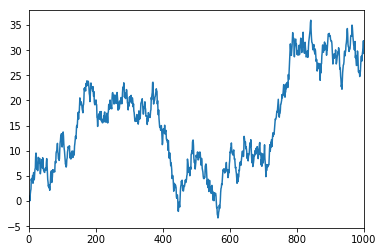

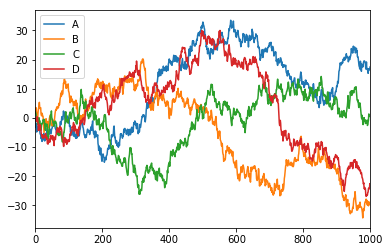

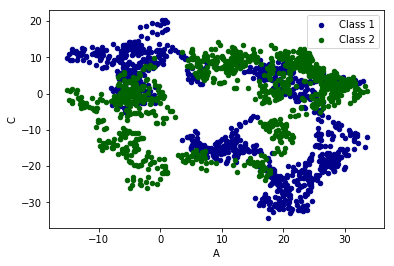

In [122]:
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
# cumsum累加
data = data.cumsum()
data.plot()
plt.show()

data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
data.plot()
plt.show()

ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label='Class 1')
data.plot.scatter(x='A', y='C', color='DarkGreen', label='Class 2', ax=ax)
plt.show()